In [56]:
import requests
import json
import os
import httpx
from PIL import Image

url = 'http://127.0.0.1:8000'

requests.post(url)

<Response [404]>

In [100]:
BACKEND_HOST = os.environ.get('BACKEND_HOST', '127.0.0.1:8000')
print(BACKEND_HOST)

127.0.0.1:8000


In [59]:
files = []

In [178]:
result = httpx.post(f'http://{BACKEND_HOST}/predict/', files=files, timeout=120)

In [140]:
result

<Response [200]>

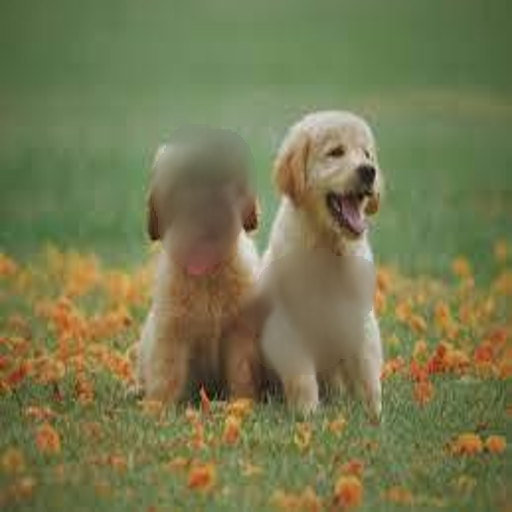

In [182]:
import base64
import io

img_row = base64.b64decode(result.content)
img = Image.open(io.BytesIO(img_row))
img

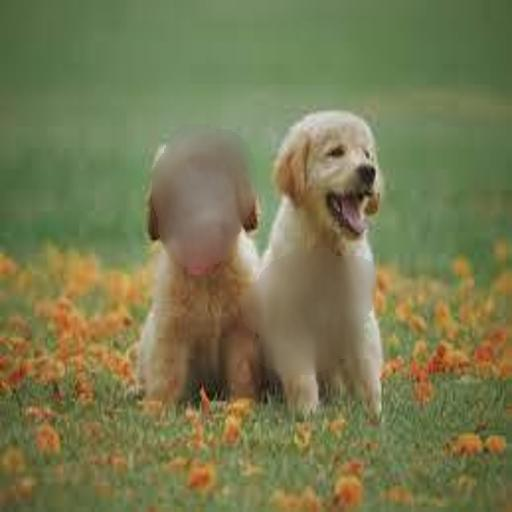

In [177]:
import base64
from email.mime import base
import io
def base64_to_pil(img_str):
    img_raw = base64.b64decode(img_str)
    img = Image.open(io.BytesIO(img_raw))

    return img

base64_to_pil(result.content)

In [144]:
import base64
Image.open(io.BytesIO(base64.b64decode(result.content)))


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x14dd6e6d0>

In [131]:
import base64
from pickletools import uint1
import matplotlib.pyplot as plt

img = np.frombuffer(base64.b64decode(result.content), dtype=np.uint8)
plt.imshow(img)


TypeError: a bytes-like object is required, not '_io.BytesIO'

In [130]:
512**2

262144

In [158]:
import base64
import numpy as np
import io
import chardet
with io.BytesIO() as output:
    img = Image.open('../samples/dog.jpg')
    img.save(output, format='JPEG')
    img = output.getvalue()
with io.BytesIO() as output:
    mask = Image.open('../samples/dog_mask.jpg')
    mask.save(output, format='PNG')
    mask = output.getvalue()

files = [('files', file) for file in [img, mask]]

In [69]:
img = '../samples/dog.jpg'
mask = '../samples/dog_mask.jpg'
files = [('files', file) for file in [img, mask]]

In [47]:
json.dumps([img, mask])

'["../samples/dog.jpg", "../samples/dog_mask.jpg"]'